# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<br>В качестве исходных данных получена таблица с информацией о квартирах, выставленных на продажу. 
<br>Поля таблицы:
<br>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
<br>balcony — число балконов
<br>ceiling_height — высота потолков (м)
<br>cityCenters_nearest — расстояние до центра города (м)
<br>days_exposition — сколько дней было размещено объявление (от публикации до снятия)
<br>first_day_exposition — дата публикации
<br>floor — этаж
<br>floors_total — всего этажей в доме
<br>is_apartment — апартаменты (булев тип)
<br>kitchen_area — площадь кухни в квадратных метрах (м²)
<br>last_price — цена на момент снятия с публикации
<br>living_area — жилая площадь в квадратных метрах(м²)
<br>locality_name — название населённого пункта
<br>open_plan — свободная планировка (булев тип)
<br>parks_around3000 — число парков в радиусе 3 км
<br>parks_nearest — расстояние до ближайшего парка (м)
<br>ponds_around3000 — число водоёмов в радиусе 3 км
<br>ponds_nearest — расстояние до ближайшего водоёма (м)
<br>rooms — число комнат
<br>studio — квартира-студия (булев тип)
<br>total_area — площадь квартиры в квадратных метрах (м²)
<br>total_images — число фотографий квартиры в объявлении

Исследование разделено на несколько частей:

<b> Данное исследование разделим на несколько частей.

<b> Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#ch_1_1)

<b> Часть 2. Предобработка данных:
* [1. Нахождение и ликвидация пропусков.](#ch_2_1)
* [2. Приведение данных к нужным типам.](#ch_2_2)

<b> Часть 3. Расчет и добавление данных в таблицу:
* [1. Добавить столбцы в таблицу.](#ch_3_1)

<b> Часть 4. Проведение исследовательского анализа:
* [1. Построение гистограмм по некоторым параметрам.](#ch_4_1)
* [2. Изучить время продажи квартир.](#ch_4_2)
* [3. Убрать выбросы.](#ch_4_3)
* [4. Анализ влияния факторов на стоимость квартиры.](#ch_4_4)
* [5. Анализ на выборке с наибольшим количеством объявлений.](#ch_4_5)
* [6. Выделение центральной зоны Санкт-Петербурга исходя из цен на квартиры.](#ch_4_6)
* [7. Анализ цен на квартиры в центре Санкт-Петербурга.](#ch_4_7)
   


<b> Часть 5. Выводы:
* [1. Выводы.](#ch_5_1)

## Шаг 1. Откройте файл с данными и изучите общую информацию.   <a id='ch_1_1'></a>

In [60]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#data.describe()
data.info()
#print(data['ceiling_height'].sort_values(ascending = False).head(50))
#data.hist(column = 'ceiling_height', bins = 100, range = (1,2.5))
#print(data.query('ceiling_height< 2.3'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<b>Вывод

Есть с чем работать в плане заполнения пустых значений. <br>
Бросается в глаза максимальное значение высоты потолка в 100м, минимальное в 1м. Подробно этот вопрос будет рассмотрен в следующем пункте.

## Шаг 2. Предобработка данных 

### Нахождение и ликвидация пропусков <a id='ch_2_1'></a>

In [61]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 25, data['ceiling_height']/10 )
mean_height = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(mean_height)
data = data.query('ceiling_height >= 2.5') 
data['is_apartment'] =data['is_apartment'].fillna(False)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data = data.query('locality_name.notnull()')

<B> Вывод

Отброшены строки с выбросами в меньшую сторону по высоте потолка, высота потолков от ~20~ 25 метров уменьшена в 10 раз. На место пустых значений подставлены средние, т.к. отличия от медианы несущественны. <br>Пустые значения в полях с количествм парков и прудов в радиусе 3 км, а также балконов, заполним нулями. Их могли забыть заполнить. Аналогично для колонки "is_apartment", пустые значения заполним значением False.  <br>Строки с пустым названием населенного пункта удалим.

In [62]:
kitchen_avg_coef = data.query('kitchen_area.notnull()')
kitchen_avg_coef = (kitchen_avg_coef['kitchen_area'] / kitchen_avg_coef['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_avg_coef * data['total_area'])

living_avg_coef = data.query('living_area.notnull()')
living_avg_coef = (living_avg_coef['living_area'] / living_avg_coef['total_area']).mean()
data['living_area'] = data['living_area'].fillna(living_avg_coef * data['total_area'])

floors_avg_coef = data.query('floor.notnull()')
floors_avg_coef = (floors_avg_coef['floors_total'] - floors_avg_coef['floor']).mean().round()
data['floors_total'] = data['floors_total'].fillna(data['floor']+floors_avg_coef)

data = data.query('days_exposition.notnull()')
#data.info()
data.describe()

#noexpdate = data.query('days_exposition.isnull()')
#print(noexpdate['last_price'].mean()/ data['last_price'].mean(), noexpdate['last_price'].count() )
#print(noexpdate['locality_name'].value_counts())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20407.000000,2.040700e+04,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,15765.000000,15787.000000,20407.000000,6895.000000,20407.000000,7850.000000,20407.000000
mean,9.621355,6.272857e+06,58.878651,2.024011,2.730829,10.887343,33.602576,5.993336,10.424996,0.591513,28854.288233,14297.702223,0.464203,491.130529,0.588328,520.245478,180.851424
std,5.659969,1.088889e+07,34.119237,1.055554,0.318754,6.653535,21.385919,4.946024,5.841943,0.948721,12713.359383,8556.336640,0.745058,346.308164,0.879224,277.195646,219.957507
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18496.000000,9488.000000,0.000000,286.000000,0.000000,300.000000,45.000000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.733740,9.000000,30.000000,4.000000,9.000000,0.000000,26798.000000,13168.000000,0.000000,451.000000,0.000000,504.000000,95.000000
75%,14.000000,6.500000e+06,67.900000,3.000000,2.733740,16.000000,41.200000,8.000000,11.900000,1.000000,37407.000000,16383.000000,1.000000,614.000000,1.000000,731.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,24.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пустые значения колонок living_area и kitchen_area заполним средними значениями доли этих комнат от total_area.
 <br> Колонка с этажом, на котором находится квартира, заполнена полностью, в отличии от полной этажности дома. Заполним колонку с количеством этажей, исходя из cредней разницы этажа квартиры с общей этажностью. Заполнять средним/медианой было бы неправильно, т.к. этаж квартиры в строках с пропущенной общей этажностью больше 10.66 (среднее поля floors_total), а значит, общая этажность будет подавно выше.<br>Пропуски могут возникать в результате того, что поля в форме анкеты могут быть не обязательными для заполнения, также данные могут теряться в процессе передачи.

### Приведение данных к нужным типам <a id='ch_2_2'></a>

In [63]:
print(data['first_day_exposition'].head(5))
data.info()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('Int8')
data['balcony'] = data['balcony'].astype('Int8')
data['airports_nearest'] = data['airports_nearest'].astype('Int32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int32')
data['parks_around3000'] = data['parks_around3000'].astype('Int32')
data['parks_nearest'] = data['parks_nearest'].astype('Int32')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int32')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int32')
data['days_exposition'] = data['days_exposition'].round().astype('Int32')
data.info()

1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
Name: first_day_exposition, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20407 entries, 1 to 23697
Data columns (total 22 columns):
total_images            20407 non-null int64
last_price              20407 non-null float64
total_area              20407 non-null float64
first_day_exposition    20407 non-null object
rooms                   20407 non-null int64
ceiling_height          20407 non-null float64
floors_total            20407 non-null float64
living_area             20407 non-null float64
floor                   20407 non-null int64
is_apartment            20407 non-null bool
studio                  20407 non-null bool
open_plan               20407 non-null bool
kitchen_area            20407 non-null float64
balcony                 20407 non-null float64
locality_name           20407 non-null object
airports_nearest        15765 non-nu

<B> Вывод

Поле first_day_exposition приведено к формату даты, остальные поля с расстояниями в метрах, количествами в штуках, количестве дней действия объявления, приведены к целочисленному типу (Int, а не int, чтобы обойти ошибку с NA).

## Шаг 3. Посчитайте и добавьте в таблицу <a id='ch_3_1'></a>

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [64]:
data['sq_meter_price'] = data['last_price'] / data['total_area']
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['floor_grouped'] = np.where(data['floor'] == 1, "Первый",
                            np.where(data['floor'] == data['floors_total'], "Последний", "Другой"))
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']
data['living_total_ratio'] = data['living_area'] / data['total_area']

data['sq_meter_price'] = data['sq_meter_price'].round(2)
data['living_total_ratio'] = data['living_total_ratio'].round(2)
data['kitchen_total_ratio'] = data['kitchen_total_ratio'].round(2)
data['living_area'] = data['living_area'].round(2)
data['ceiling_height'] = data['ceiling_height'].round(2)
data.describe()
#print(data.head(5))


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,kitchen_total_ratio,living_total_ratio
count,20407.000000,2.040700e+04,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000,...,6895.000000,20407.000000,7850.000000,20407.000000,2.040700e+04,20407.000000,20407.000000,20407.000000,20407.000000,20407.000000
mean,9.621355,6.272857e+06,58.878651,2.024011,2.729283,10.887343,33.602567,5.993336,10.424996,0.591513,...,491.130529,0.588328,520.245478,180.851424,9.809900e+04,2.585681,6.587151,2017.217768,0.189369,0.562308
std,5.659969,1.088889e+07,34.119237,1.055554,0.318745,6.653535,21.385913,4.946024,5.841943,0.948721,...,346.308164,0.879224,277.195646,219.957507,4.779238e+04,1.782553,3.486232,0.966108,0.069008,0.100933
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.030000,0.020000
25%,6.000000,3.400000e+06,39.500000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,286.000000,0.000000,300.000000,45.000000,7.653061e+04,1.000000,3.000000,2017.000000,0.140000,0.500000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.730000,9.000000,30.000000,4.000000,9.000000,0.000000,...,451.000000,0.000000,504.000000,95.000000,9.411765e+04,3.000000,7.000000,2017.000000,0.190000,0.560000
75%,14.000000,6.500000e+06,67.900000,3.000000,2.730000,16.000000,41.200000,8.000000,11.900000,1.000000,...,614.000000,1.000000,731.000000,231.000000,1.122257e+05,4.000000,10.000000,2018.000000,0.230000,0.630000
max,50.000000,7.630000e+08,900.000000,19.000000,24.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,0.790000,1.000000


<b> Вывод

Данные добавлены в соответствии с заданием. Данные по группировке этажности добавлены с помощью вложенного метода np.where()

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра. <a id='ch_4_1'></a>




,total_area,last_price,rooms,ceiling_height
count,20407.000000,2.040700e+04,20407.000000,20407.000000
mean,58.878651,6.272857e+06,2.024011,2.729283
std,34.119237,1.088889e+07,1.055554,0.318745
min,12.000000,1.219000e+04,0.000000,2.500000
25%,39.500000,3.400000e+06,1.000000,2.600000
50%,50.900000,4.500000e+06,2.000000,2.730000
75%,67.900000,6.500000e+06,3.000000,2.730000
max,900.000000,7.630000e+08,19.000000,24.000000


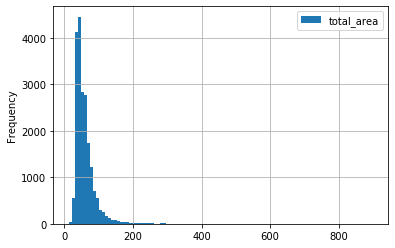

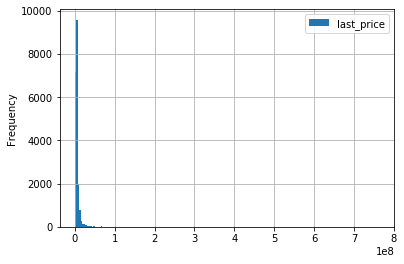

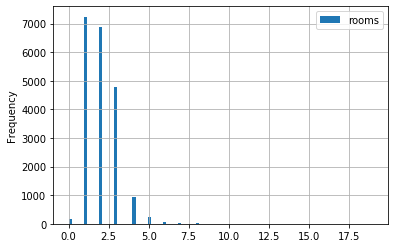

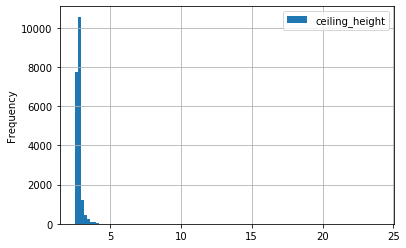

In [65]:
data.plot(kind = 'hist', bins = 100, y = 'total_area', grid = True)
data.plot(kind = 'hist', bins = 200, y = 'last_price', grid = True)
data.plot(kind = 'hist', bins = 100, y = 'rooms', grid = True)
data.plot(kind = 'hist', bins = 100, y = 'ceiling_height', grid = True)
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()


<b> Вывод

Все графики похожи на нормальное распределение. Наиболее часто встречаются квартиры с площадью около 50 кв.м., ценой около 4 млн.рублей, 1,2,3 комнатами, высотой потолков около 2.75 м. При этом встречаются существенные выбросы в большую сторону (до 900 кв.м., 76.3 млн рублей, 19 комнат, 100 метров высоты потолка в исходных данных и 14 метров после удаления выбросов на этапе предобработки данных)

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? <a id='ch_4_2'></a>


count    20407.000000
mean       180.851424
std        219.957507
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

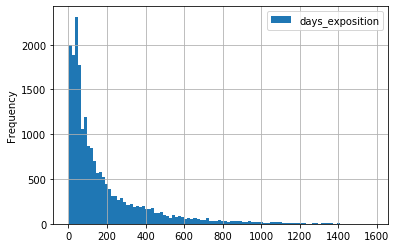

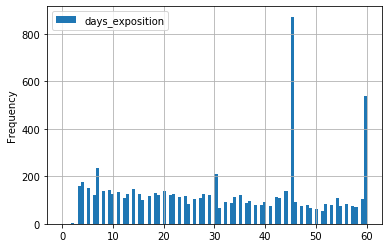

In [66]:
data.plot(kind = 'hist', bins = 100, y = 'days_exposition', grid = True)
data.plot(kind = 'hist', bins = 100, y = 'days_exposition', grid = True, range = (0,60))

data['days_exposition'].describe()

<b> Вывод

Среднее значение (180.76) колонки почти в два раза больше медианной (95), что свидетельствует о наличии длинного хвоста, который наглядно показан на гистограмме. Также, наблюдается скачок продаж на 45й и 60й дни (гистограмма 2). В целом, если квартира продана быстрее, чем за 45 дней, можно сказать, что продажа прошла быстро. Если квартира продаётся более 600 дней, это будет слишком долго.

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Согласна.
</div>

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили. <a id='ch_4_3'></a>

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,weekday_exposition,month_exposition,year_exposition,kitchen_total_ratio,living_total_ratio
count,20248.000000,2.024800e+04,20248.000000,20248.000000,20248.000000,20248.000000,20248.000000,20248.000000,20248.000000,20248.000000,...,6777.000000,20248.000000,7732.000000,20248.000000,20248.000000,20248.000000,20248.000000,20248.000000,20248.00000,20248.000000
mean,9.600405,5.702491e+06,57.423887,2.002667,2.720914,10.910608,32.784023,5.998123,10.236628,0.592355,...,491.668290,0.580650,522.703182,179.901620,96228.197669,2.584403,6.586280,2017.221306,0.18956,0.562336
std,5.647897,4.473109e+06,27.508913,1.000071,0.193676,6.646691,17.928289,4.950877,5.048178,0.948605,...,345.543109,0.872136,277.371240,219.153128,36041.529738,1.783093,3.487457,0.963997,0.06852,0.100600
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,7962.960000,0.000000,1.000000,2014.000000,0.03000,0.040000
25%,6.000000,3.400000e+06,39.400000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,287.000000,0.000000,303.000000,45.000000,76388.890000,1.000000,3.000000,2017.000000,0.14000,0.500000
50%,9.000000,4.500000e+06,50.500000,2.000000,2.730000,9.000000,29.800000,4.000000,9.000000,0.000000,...,451.000000,0.000000,507.000000,95.000000,93877.550000,3.000000,7.000000,2017.000000,0.19000,0.560000
75%,14.000000,6.450000e+06,67.100000,3.000000,2.730000,16.000000,41.000000,8.000000,11.800000,1.000000,...,614.000000,1.000000,733.000000,229.000000,111842.110000,4.000000,10.000000,2018.000000,0.23000,0.630000
max,50.000000,5.000000e+07,297.500000,10.000000,4.500000,36.000000,200.000000,33.000000,60.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,467914.440000,6.000000,12.000000,2019.000000,0.79000,1.000000


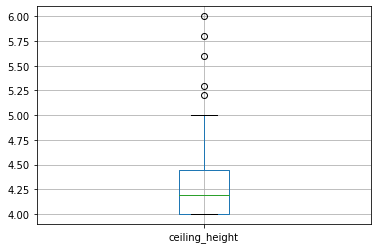

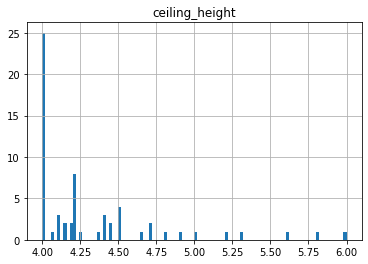

In [67]:
#data.plot(kind = 'hist', bins = 200, y = 'kitchen_area', grid = True)
#data.plot(kind = 'hist', bins = 200, y = 'living_area', grid = True)
#data.plot(kind = 'hist', bins = 200, y = 'sq_meter_price', grid = True)
#data.plot(kind = 'hist', bins = 200, y = 'parks_nearest', grid = True)
#data.plot(kind = 'hist', bins = 200, y = 'last_price', grid = True, range = (30000000, 70000000))

#data.plot(kind = 'box', y = 'ceiling_height', grid = True, ylim = (4,5))
highceiling = data.query('4 <= ceiling_height <= 6')
#print(highceiling['locality_name'].value_counts().head(10))
highceiling.boxplot(column = 'ceiling_height')
highceiling.hist(column = 'ceiling_height', bins = 100)

data = data.query('kitchen_area <= 60 and living_area <= 200 and sq_meter_price <= 500000 and ceiling_height <= 4.5 \
                   and rooms <= 10 and total_area <= 300 and 280000 <= last_price <= 50000000 and floors_total <= 37')
data.describe()



<b> Вывод

Помимо выбросов из четырех колонок задания 4.1, найдены выбросы в колонках living_area, kitchen_area, sq_meter_price. Некоторая маленькая доля значений в этих столбцах выделяется в большую сторону. Построив гистрограммы, найдем порог, выше которого значения почти не встречаются. Удалим выбросы с помощью метода query.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. <a id='ch_4_4'></a>

                    last_price
ponds_around3000              
0                 4.846561e+06
1                 6.360294e+06
2                 7.413719e+06
3                 9.613137e+06
                    last_price
parks_around3000              
0                 4.852948e+06
1                 7.001391e+06
2                 7.965098e+06
3                 9.438791e+06


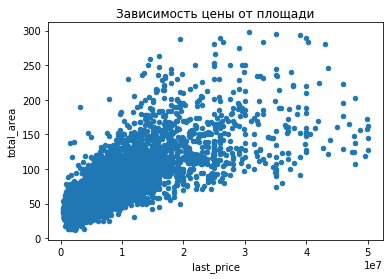

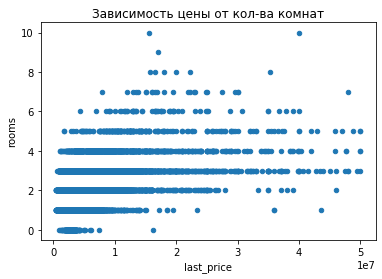

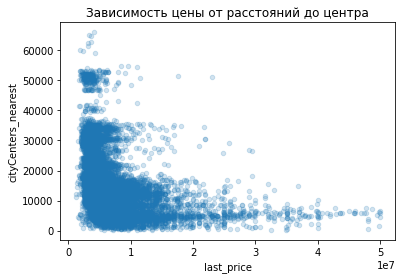

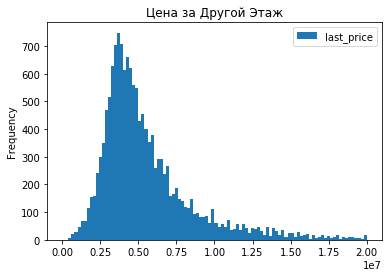

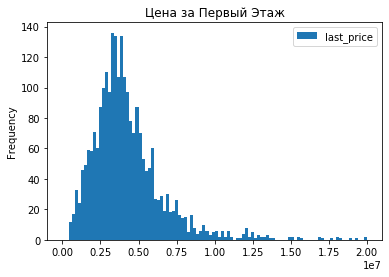

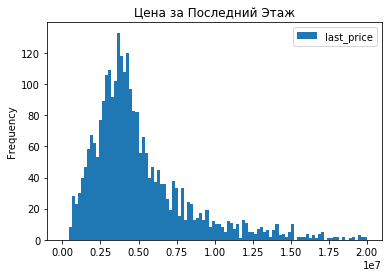

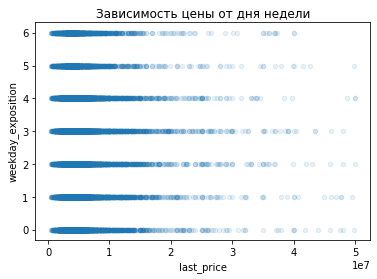

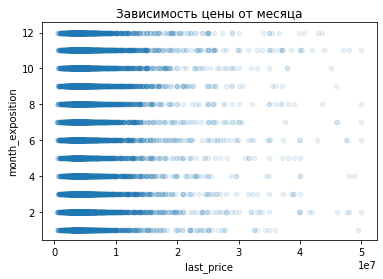

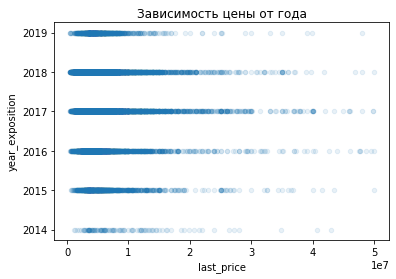

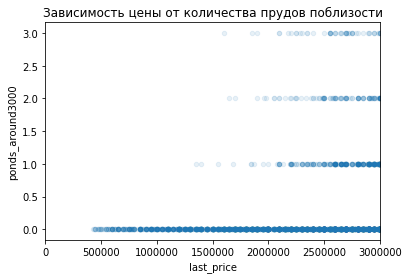

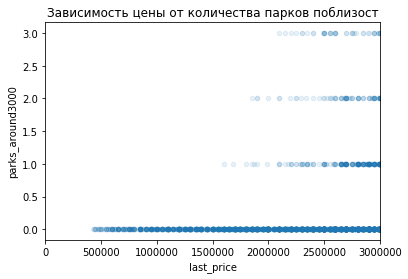

In [68]:
data.plot(kind = 'scatter', x = 'last_price', y = 'total_area', title = 'Зависимость цены от площади')
data.plot(kind = 'scatter', x = 'last_price', y = 'rooms', title = 'Зависимость цены от кол-ва комнат')
data.plot(kind = 'scatter', x = 'last_price', y = 'cityCenters_nearest', title = 'Зависимость цены от расстояний до центра', alpha = 0.2)
#data.plot(kind = 'hist', y = 'last_price', y = 'floor_grouped', title = 'Зависимость этажа от цены')

for group_name, group_data in data.groupby('floor_grouped'):
    group_data.plot(y = 'last_price', title = "Цена за " + group_name + " Этаж", kind = 'hist', bins = 100, range = (0, 20000000))

data.plot(kind = 'scatter', x = 'last_price', y = 'weekday_exposition', title = 'Зависимость цены от дня недели', alpha = 0.1)
data.plot(kind = 'scatter', x = 'last_price', y = 'month_exposition', title = 'Зависимость цены от месяца', alpha = 0.1)
data.plot(kind = 'scatter', x = 'last_price', y = 'year_exposition', title = 'Зависимость цены от года', alpha = 0.1)


data.plot(kind = 'scatter', x = 'last_price', y = 'ponds_around3000', title = 'Зависимость цены от количества прудов поблизости', alpha = 0.1, xlim = (0,3000000))
data.plot(kind = 'scatter', x = 'last_price', y = 'parks_around3000', title = 'Зависимость цены от количества парков поблизост', alpha = 0.1, xlim = (0,3000000))
print(data.pivot_table(index = 'ponds_around3000', values =  'last_price'))
print(data.pivot_table(index = 'parks_around3000', values =  'last_price'))
#data.plot(kind = 'scatter', x = 'last_price', y = 'weekday_exposition', title = 'Зависимость цены от дня недели', alpha = 0.1, xlim = (0,9000000))
#data.plot(kind = 'scatter', x = 'last_price', y = 'month_exposition', title = 'Зависимость цены от месяца', alpha = 0.1, xlim = (0,9000000))
#data.plot(kind = 'scatter', x = 'last_price', y = 'year_exposition', title = 'Зависимость цены от года', alpha = 0.1, xlim = (0,9000000))
    

<b> Вывод

Среди зависимостей цены от площади квартиры, количества комнат, расстояния до центра города, наименее показательным фактором является количество комнат. Гораздо лучше дела с площадью квартир: с ростом площади в целом растёт и цена, вместе с тем увеличивается и разброс. Средняя цена уверенно растет с приближением к центру города. Особенно ярко видна зависимость максимальных цен от близости к центру.

Зависимость цен от этажа не выражена. Гистограммы имеют схожий вид и пики в одинаковых значениях цены.
То же самое можно сказать и про годы, дни недели и месяцы размещения. Ярко выраженных скоплений значений в определенных пределах не наблюдается.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. <a id='ch_4_5'></a>

In [69]:
p = data.pivot_table(index = 'locality_name', values = ['sq_meter_price'], aggfunc = ['count', 'mean'])
p.columns = ['count', 'mean_sq_m_price']
print(p.sort_values('count', ascending = False).head(10))


                   count  mean_sq_m_price
locality_name                            
Санкт-Петербург    13461    109813.421066
посёлок Мурино       517     85818.383520
посёлок Шушары       408     78010.167525
Всеволожск           338     66878.746272
Колпино              306     74782.536863
Пушкин               301    101881.286977
посёлок Парголово    301     89534.776047
деревня Кудрово      299     92473.547559
Гатчина              268     67928.326791
Выборг               206     57184.099369


<b> Вывод

С огромным отрывом по количеству объявлений в лидеры выходит Санкт-Петербург. В нём же и самая высокая цена кв. метра. На втором месте по цене город Пушкин. Дешевле всего кв. метр в среднем стоит в Выборге - почти в два раза ниже, чем в Северной столице.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. <a id='ch_4_6'></a>

AxesSubplot(0.125,0.125;0.775x0.755)


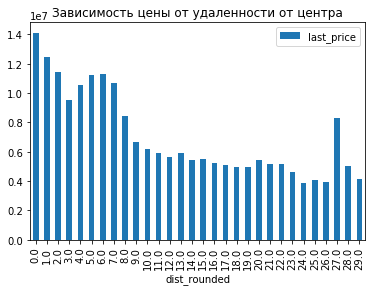

In [70]:
data['dist_rounded'] = (data['cityCenters_nearest']/1000).round(0)
saintp = data.query('locality_name == "Санкт-Петербург"')
print(saintp.pivot_table(index='dist_rounded', values = 'last_price').plot(kind = 'bar', title = 'Зависимость цены от удаленности от центра'))

<b> Вывод

За центральную зону можно принимать радиус 8 км от центра. Вне этого круга средние заметно ниже. Стоит отъехать на 7 км от центра города, и квартира в среднем обойдется в 12 миллионов, еще на 2 км - уже в 7 млн!

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу? <a id='ch_4_7'></a>

         last_price        rooms  ceiling_height   total_area
count  3.325000e+03  3325.000000     3325.000000  3325.000000
mean   1.057301e+07     2.608722        2.913738    81.134030
std    7.321839e+06     1.245443        0.303176    40.780888
min    1.600000e+06     0.000000        2.500000    12.000000
25%    6.100000e+06     2.000000        2.730000    52.000000
50%    8.400000e+06     2.000000        2.730000    72.000000
75%    1.220000e+07     3.000000        3.050000    98.400000
max    5.000000e+07    10.000000        4.500000   297.500000
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755

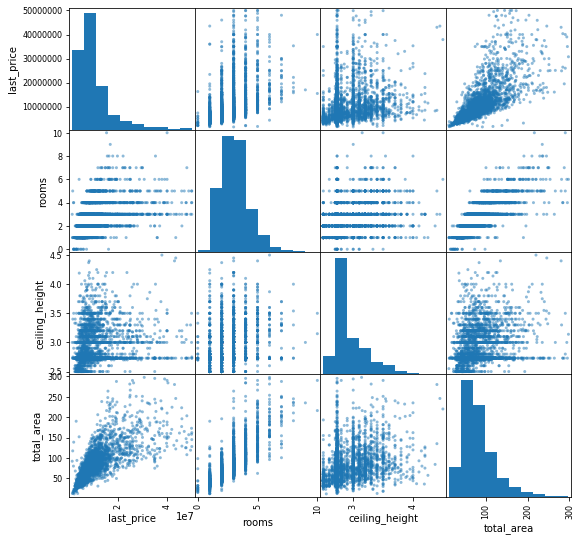

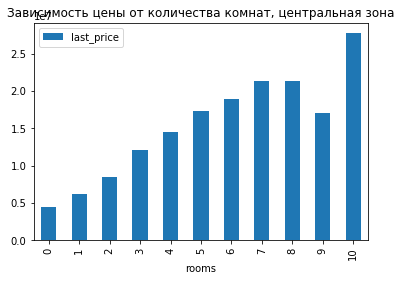

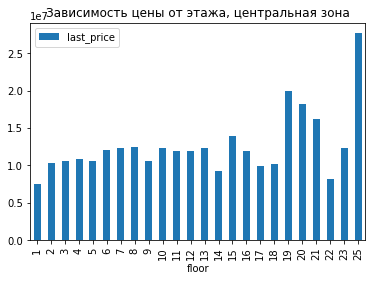

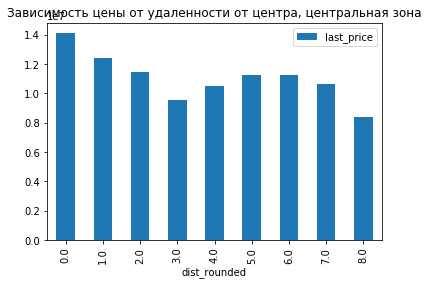

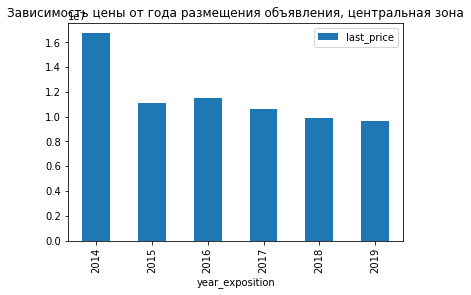

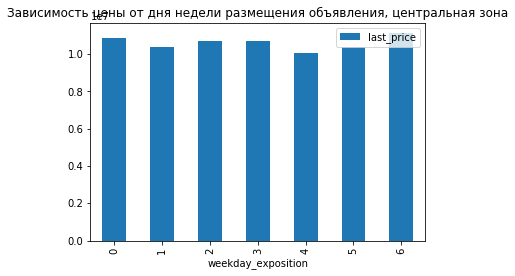

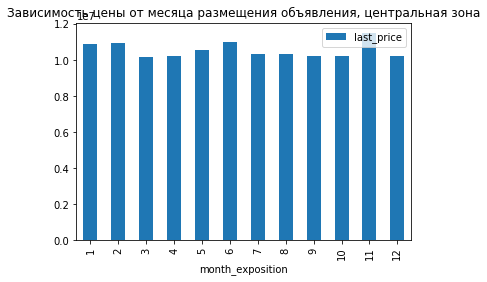

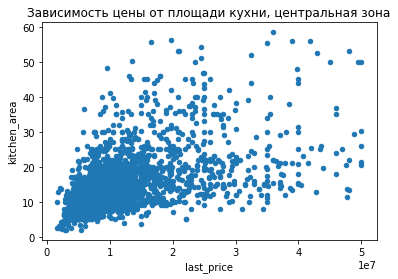

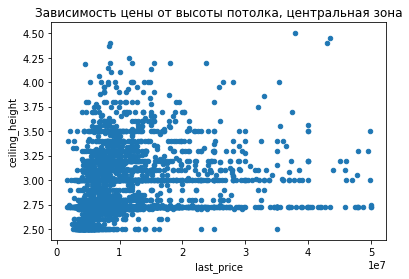

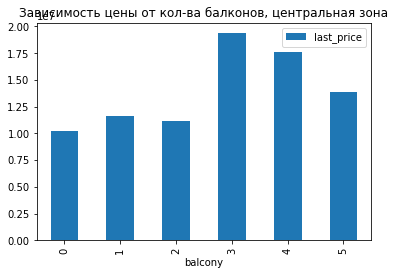

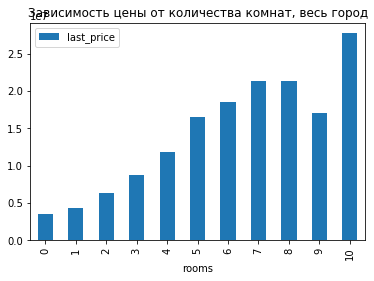

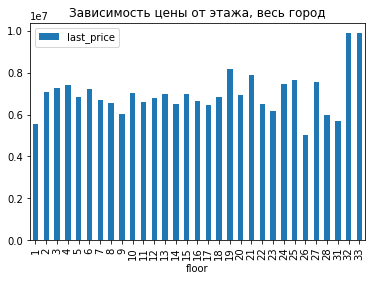

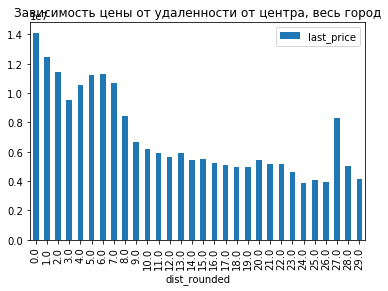

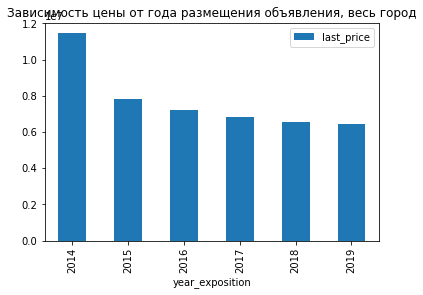

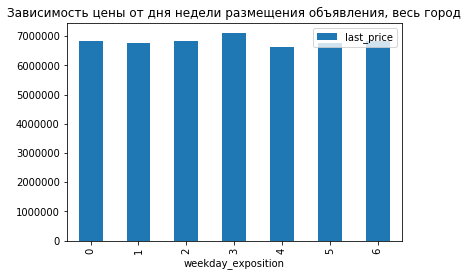

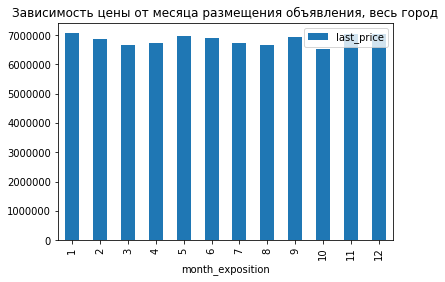

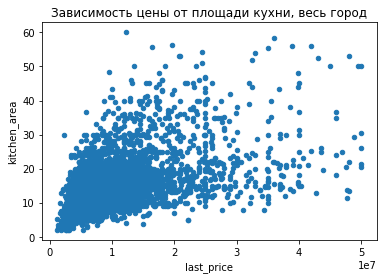

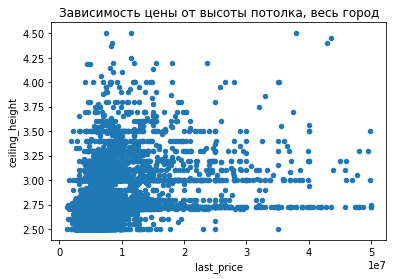

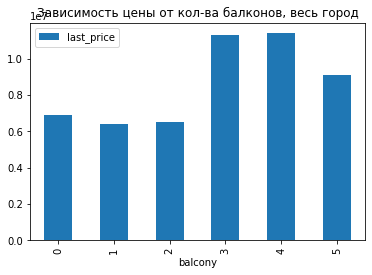

In [71]:
saintp_center = saintp.query('dist_rounded <= 8')
columns_needed = ['last_price', 'rooms', 'ceiling_height', 'total_area']
print(saintp_center[columns_needed].describe())
pd.plotting.scatter_matrix(saintp_center[columns_needed], figsize=(9, 9))


print(saintp_center.pivot_table(index='rooms', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от количества комнат, центральная зона'))
print(saintp_center.pivot_table(index='floor', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от этажа, центральная зона'))
print(saintp_center.pivot_table(index='dist_rounded', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от удаленности от центра, центральная зона'))
print(saintp_center.pivot_table(index='year_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от года размещения объявления, центральная зона'))
print(saintp_center.pivot_table(index='weekday_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от дня недели размещения объявления, центральная зона'))
print(saintp_center.pivot_table(index='month_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от месяца размещения объявления, центральная зона'))
saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'kitchen_area', title = 'Зависимость цены от площади кухни, центральная зона')
saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'ceiling_height', title = 'Зависимость цены от высоты потолка, центральная зона')

#print(saintp_center.pivot_table(index='kitchen_area', values = 'last_price').plot(kind = 'bar',\
#                                    title = 'Зависимость цены от площади кухни, центральная зона'))
#print(saintp_center.pivot_table(index='ceiling_height', values = 'last_price').plot(kind = 'bar',\
#                                    title = 'Зависимость цены от высоты потолка, центральная зона'))
print(saintp_center.pivot_table(index='balcony', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от кол-ва балконов, центральная зона'))




print(saintp.pivot_table(index='rooms', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от количества комнат, весь город'))
print(saintp.pivot_table(index='floor', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от этажа, весь город'))
print(saintp.pivot_table(index='dist_rounded', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от удаленности от центра, весь город'))
print(saintp.pivot_table(index='year_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от года размещения объявления, весь город'))
print(saintp.pivot_table(index='weekday_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от дня недели размещения объявления, весь город'))
print(saintp.pivot_table(index='month_exposition', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от месяца размещения объявления, весь город'))
saintp.plot(kind = 'scatter', x = 'last_price', y = 'kitchen_area', title = 'Зависимость цены от площади кухни, весь город')
saintp.plot(kind = 'scatter', x = 'last_price', y = 'ceiling_height', title = 'Зависимость цены от высоты потолка, весь город')
#print(saintp.pivot_table(index='kitchen_area', values = 'last_price').plot(kind = 'bar',\
#                                    title = 'Зависимость цены от площади кухни, весь город'))
#print(saintp.pivot_table(index='ceiling_height', values = 'last_price').plot(kind = 'bar',\
#                                    title = 'Зависимость цены от высоты потолка, весь город'))
print(saintp.pivot_table(index='balcony', values = 'last_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены от кол-ва балконов, весь город'))



#saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'rooms', title = 'Зависимость цены от кол-ва комнат')
#saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'floor', title = 'Зависимость цены от этажа')
#saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'dist_rounded', title = 'Зависимость цены от удаленности от центра')
#saintp_center.plot(kind = 'scatter', x = 'last_price', y = 'first_day_exposition', title = 'Зависимость цены от даты размещения')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


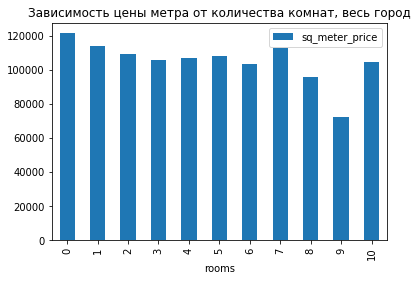

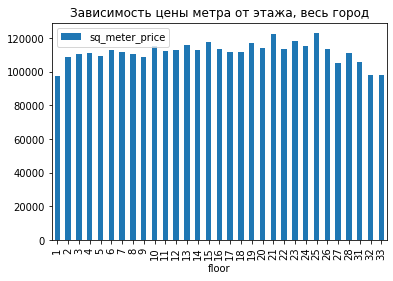

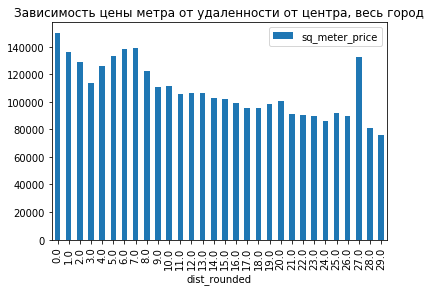

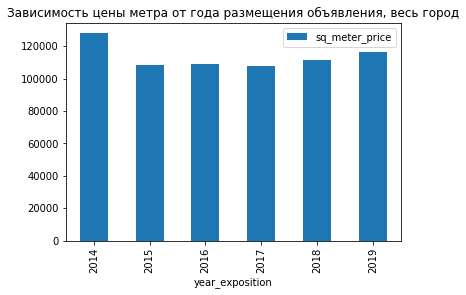

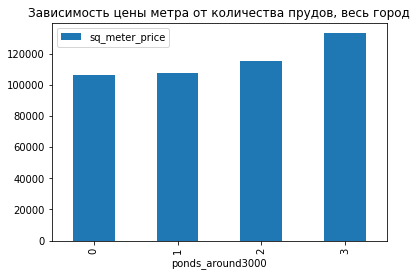

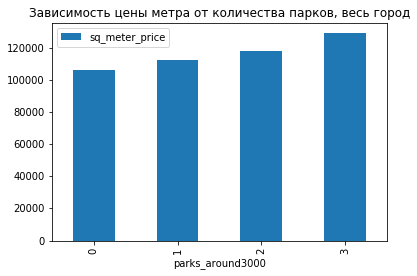

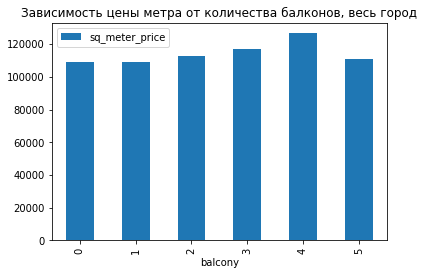

In [72]:
print(saintp.pivot_table(index='rooms', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от количества комнат, весь город'))
print(saintp.pivot_table(index='floor', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от этажа, весь город'))
print(saintp.pivot_table(index='dist_rounded', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от удаленности от центра, весь город'))
print(saintp.pivot_table(index='year_exposition', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от года размещения объявления, весь город'))
print(saintp.pivot_table(index='ponds_around3000', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от количества прудов, весь город'))
print(saintp.pivot_table(index='parks_around3000', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от количества парков, весь город'))
print(saintp.pivot_table(index='balcony', values = 'sq_meter_price').plot(kind = 'bar',\
                                    title = 'Зависимость цены метра от количества балконов, весь город'))

<b> Вывод

В центральной части Петербурга средняя цена квартиры - 11.1 миллион рублей, большинство квартир имеют 3 или 4 комнаты, часто встречаются высоты потолков около 2.75 м, но и не мало квартир с потолками от 3 до 3.4 метров. Средняя площадь квартир 83 кв.м.

Зависимость стоимости от других факторов тяжело выявить по диаграммам рассеяния, то ли дело сводные таблицы. Наилучшим образом видна зависимость цены от количества комнат, где линейный тренд просаживается на 8 и 9 комнатах. Возможно, требуется учесть другие факторы. Зависимость от этажа не такая яркая, квартиры, расположенные на определенных высоких этажах, стоят заметно выше. Связи с расстоянием от центра города в центральной зоне почти нет, разве что если это самый центр. В плане времени объявлений интересен 2014 год, квартиры, выставленные в течение этого года, стоят заметно больше.
В целом эти тенденции похожи как для центральной части Санкт-Петербурга, так и для всего города.

## Шаг 5. Общий вывод <a id='ch_5_1'></a>

Проведён анализ недвижимости в Санкт-Петербурге и области. Если смотреть в целом по выборке, то квартиры довольно стандартны: в среднем по две комнаты, потолки около 2.7 метров высотой, около 60 кв. метров. Дореволюционные квартиры центра Петербурга выделяются: в среднем 2.6 комнат, потолки в среднем выше более чем на 20 см, а площадь на 23 кв.м. Но есть у жизни в городе на Неве и обратная сторона - квартиры в центре города в среднем дороже почти в два раза, чем в общем по выборке.